In [ ]:
# ! pip install python-dotenv

In [1]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

True

In [2]:
# ! pip install openai

In [3]:
# Access the API key
api_key = os.getenv("AZURE_OPENAI_API_KEY")
api_version = os.getenv("API_VERSION")
api_endpoint = os.getenv("AZURE_BASE_URL")
together_api = os.getenv("TOGETHER_API_KEY")

# model_name = "gpt-4o-mini"
model_name = "deepseek-ai/DeepSeek-R1-Distill-Llama-70B-free"

In [ ]:
from together import Together

client = Together(
    api_key=together_api
)

In [ ]:
# # COnfigure OPenAI
# openai.api_type = "azure"
# openai.api_key = api_key
# openai.api_endpoint = api_endpoint
# openai.api_version = "2023-03-15-preview"

In [ ]:
# response = openai.chat.completions.create(
#     model = "gpt-4o-mini",
#     azure_endpoint = api_endpoint,
#     messages = [
#         {"role": "system", "content": "You're a helpful assistant."},
#         {"role": "user", "content": "Tell me a joke"}
#     ]
# )

### Image Comprehension

In [6]:
import requests

url = f"https://picsum.photos/1280/720"
response = requests.get(url, verify=False)
image_url = response.url

/home/varun/Documents/MS/Project/LangLeap/.venv/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'picsum.photos'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/varun/Documents/MS/Project/LangLeap/.venv/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fastly.picsum.photos'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


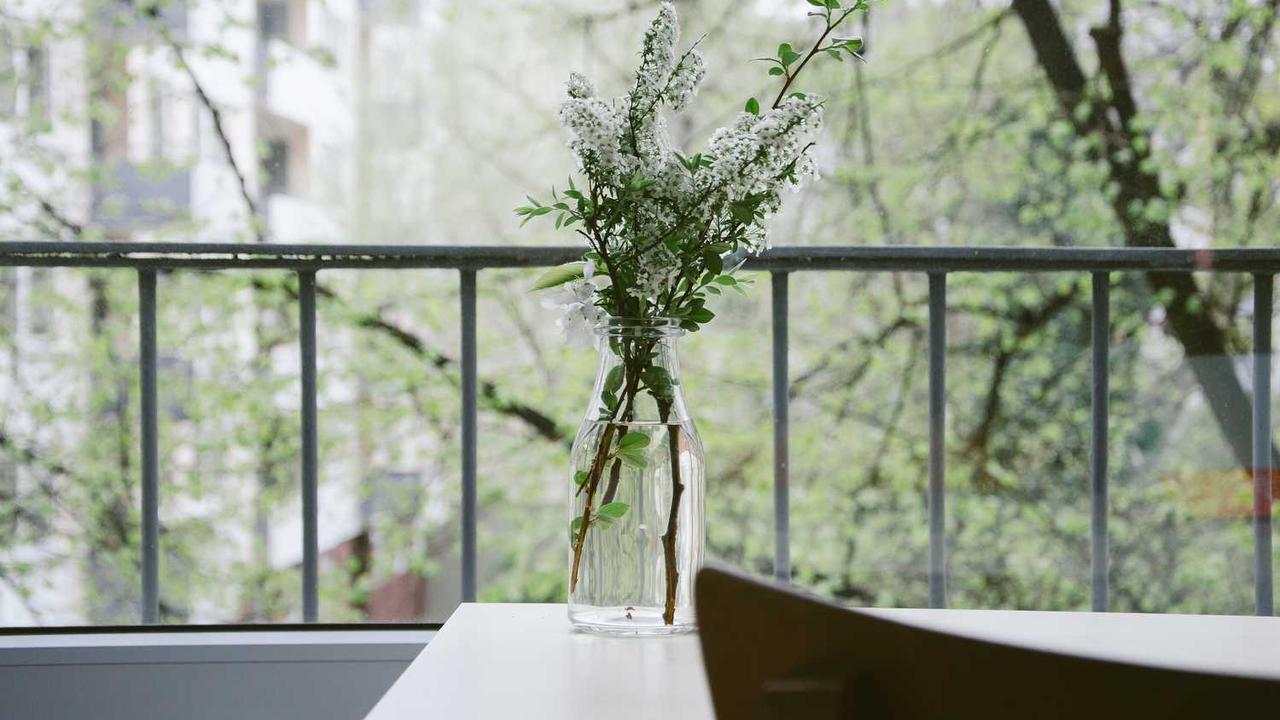

In [7]:
from IPython.display import display
from PIL import Image
from io import BytesIO

# Convert response to image
image = Image.open(BytesIO(response.content))

# Display the image
display(image)

In [ ]:
# ! pip install pillow

In [11]:
# from openai import AzureOpenAI

# client = AzureOpenAI(
#     api_key=api_key,
#     api_version=api_version,
#     azure_endpoint=api_endpoint)

response = client.chat.completions.create(
      model=model_name,
      messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": "describe something like in an IELTS exam. Keep it consize and within 50 words"},
          ],
        }
      ],
    )

print("Chat GPT:")
print(response.choices[0].message.content.split("</think>")[-1].strip())
# return response.choices[0].message.content

Chat GPT:
The bar chart illustrates energy consumption by source in three countries over five years. It shows a steady increase in renewable energy use, while fossil fuel consumption remains dominant but stable. Solar and wind energy see significant growth, especially in Country A, highlighting a global shift toward sustainable resources.


In [ ]:
model_desc = response.choices[0].message.content

In [ ]:
from openai import AzureOpenAI

client = AzureOpenAI(
    api_key=api_key,
    api_version=api_version,
    azure_endpoint=api_endpoint)

response = client.chat.completions.create(
      model=model_name,
      messages=[
        {
          "role": "user",
          "content": [
            {
                "type": "text",
                "text": "describe this image like a begineer who has little knowledge of english Keep it consize and within 50 words"},
            {
              "type": "image_url",
              "image_url": {
                "url": image_url,
              },
            },
          ],
        }
      ],
      max_tokens=50,
    )

print("Chat GPT:")
print(response.choices[0].message.content)
# return response.choices[0].message.content

In [ ]:
user_desc = response.choices[0].message.content

In [ ]:
completion = client.chat.completions.create(
      model=model_name,
      messages=[
      {
          "role": "system", 
          "content": "You are a language teacher. you have a predefined description of an image, and also a user written dscription. you just have to judge the language, grammer and vocabolary of the user provided description. keep in mind that the user is a beginner so be supportive and helpful."
          },
      {
          "role": "user", 
          "content": f"Description: {model_desc},user Description: {user_desc}. based on these two respond what all the user can improve in their description of the image, keep it consize and to the point "
          }
      ],
      # max_tokens=100,
    )

print(completion.choices[0].message.content)

In [ ]:
# ! pip install together